# Alzheimers Classification exploration using tensorflow
Josh Scherer, Jackson Shelby, Michelle Wang, Alex Zhang
### In this notebook, we will explore different ML methods for classifying brain scans at risk for Parkinsons disease

Import necessary packages here for deep learning NN methods

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


Alzheimer data has 4 classes: Non Demented, Very Mild Demented, Moderately Demented, Mild Demented

images are 180x180

Filepath will be configured for the dataset downladed into a folder called "data"

https://keras.io/api/preprocessing/image/

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                'data/AugmentedAlzheimerDataset',
                labels="inferred",
                label_mode="int",
                class_names=None,
                color_mode="rgb",
                batch_size=32,
                image_size=(180, 180),  # can change this, maybe avg dimensions over all pics
                shuffle=True,
                seed=69, #haha
                validation_split=.2,
                subset='training',
                interpolation="bilinear",
                follow_links=False,
                crop_to_aspect_ratio=False
            )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
                'data/AugmentedAlzheimerDataset',
                labels="inferred",
                label_mode="int",
                class_names=None,
                color_mode="rgb",
                batch_size=32,
                image_size=(180, 180),  # can change this, maybe avg dimensions over all pics
                shuffle=True,
                seed=69, #haha
                validation_split=.2,
                subset='validation',
                interpolation="bilinear",
                follow_links=False,
                crop_to_aspect_ratio=False
            )

Found 33984 files belonging to 4 classes.
Using 27188 files for training.
Found 33984 files belonging to 4 classes.
Using 6796 files for validation.


### let's take a look at the dataset now that we have it imported

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


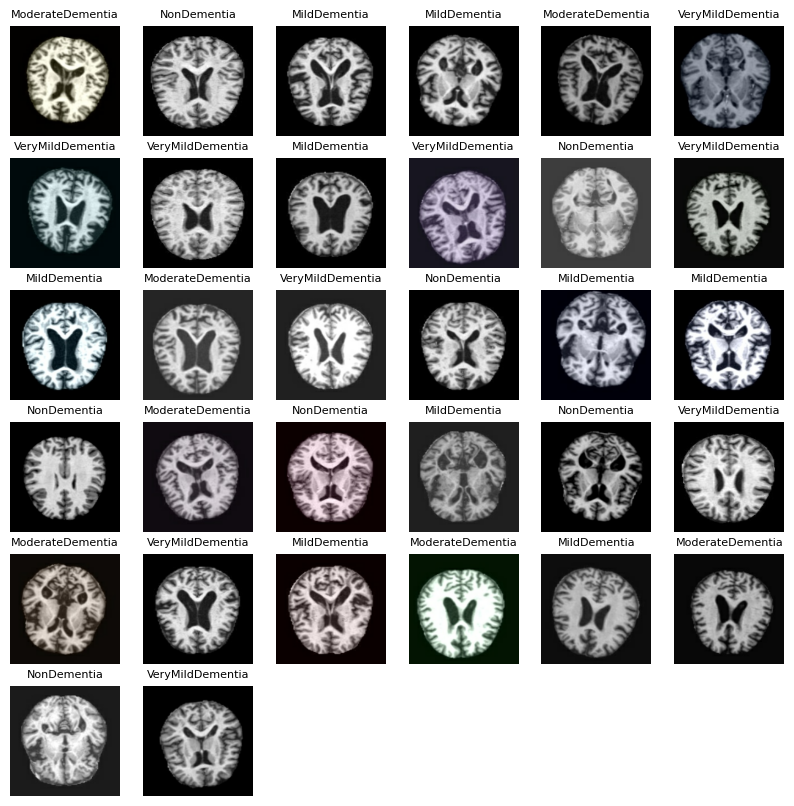

In [24]:
print(train_ds)
classes = ['MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']
train_ds.class_names = classes
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[labels[i]], fontsize=8)
        plt.axis("off")